# 数据分析

In [1]:
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
import cx_Oracle as oracle

import os 
os.environ['NLS_LANG'] = 'SIMPLIFIED CHINESE_CHINA.UTF8' 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [3]:
#conn = oracle.connect('NNSCUSER','NNSCUSER','192.168.1.171/orcl')

In [4]:
table_name = ['CMP3$97678',
              'MT_CF_PAGEQUERY',
              'MT_CF_QUERYCHART',
              'MT_CF_QUERYCOLUMNALARM',
              'MT_CF_QUERYCOLUMNS',
              'MT_CF_QUERYFUNCTION',
              'MT_CF_QUERYSINGCHART',
              'MT_DC_CONVEYANCE_PRODUCTION',
              'MT_DC_PB_MACHINEAREA',
              'MT_DC_PB_MACHINEGROUP',
              'MT_DC_PB_PARAMCODE',
              'MT_DC_PB_REJECTCODE',
              'MT_DC_PB_REJECTTYPE',
              'MT_DC_PB_REQUESTCODE',
              'MT_DC_PB_STATUSCODE',
              'MT_DC_PB_STOPCODE',
              'MT_DC_PB_WASTECODE',
              'MT_DC_PB_WEIGHT_CODE',
              'MT_DC_PM_LONGSTOPCODE',
              'MT_DC_PM_MP_FILETYPE',
              'MT_DC_PM_MP_GD102DATA_CUR',
              'MT_DC_PM_MP_GD1057DATA_CUR',
              'MT_DC_PM_MP_PT102DATA_CUR',
              'MT_DC_PM_MP_PT1057DATA_CUR',
              'MT_DC_PM_MP_TS102DATA',
              'MT_DC_ZX102_CUR',
              'MT_PB_CLASS',
              'MT_PB_INFOCLASS',
              'MT_PB_ISVALID',
              'MT_PB_MACHINE',
              'MT_PB_MACHINECLASS',
              'MT_PB_MACHINEPART',
              'MT_PB_MACHINESTATUS',
              'MT_PB_MACHINETYPE',
              'MT_PB_MACHINETYPEPART',
              'MT_PB_NEWSTYPE',
              'MT_PB_NOTICEBOARD',
              'MT_PB_NOTICERECEIVE',
              'MT_PB_ORG',
              'MT_PB_POST',
              'MT_PB_PRODUCT',
              'MT_PB_PRODUCTCATENA',
              'MT_PB_SHIFT',
              'MT_PB_SHIFTARRANGE',
              'MT_PB_UNIT',
              'MT_QL_PARAMETER',
              'TEST_DATA',
              'TEST_MAIN']

tables = {}
table_num = [7, 11, 15, 20, 21, 22, 23, 25, 29, 40, 46, 47, 1, 2, 4, 6, 10, 14, 16, 17, 30, 32, 33]
# for n in table_num:
#     tn = table_name[n]
#     sql = 'select * from ' + tn
#     df = pd.read_sql(sql, conn)
#     tables[tn] = df
#     df.to_csv(tn + '.csv')

In [5]:
# tb_20 = tables[table_name[20]]
tb_20 = pd.read_csv('MT_DC_PM_MP_GD102DATA_CUR.csv')
# tb_21 = tables[table_name[21]]
tb_21 = pd.read_csv('MT_DC_PM_MP_GD1057DATA_CUR.csv')
# tb_22 = tables[table_name[22]]
tb_22 = pd.read_csv('MT_DC_PM_MP_PT102DATA_CUR.csv')
# tb_23 = tables[table_name[23]]
tb_23 = pd.read_csv('MT_DC_PM_MP_PT1057DATA_CUR.csv')
# tb_46 = tables[table_name[46]]
tb_46 = pd.read_csv('TEST_DATA.csv')
# tb_47 = tables[table_name[47]]
tb_47 = pd.read_csv('TEST_MAIN.csv')
# tb_07 = tables[table_name[7]]
# tb_25 = tables[table_name[25]]

## 表20  MT_DC_PM_MP_GD102DATA_CUR  包装机生产数据

In [6]:
tb_20_new = tb_20[['PRODUCEDATE', 'PB_SHIFT_ID', 'PM_MP_MACHINE_ID', 'PB_PRODUCT_ID', 'GATHERDATETIME', 'INTERNALSTOPTIME',
                   'RUNTIME', 'PRODUCETIME', 'THEORETICALPRODUCTION','REALPRODUCTION', 'REJECTPRODUCTION',
                   'EFFPRODUCTION', 'EFFMACHINE', 'STOPCNT']]
tb_20_new.head()

,PRODUCEDATE,PB_SHIFT_ID,PM_MP_MACHINE_ID,PB_PRODUCT_ID,GATHERDATETIME,INTERNALSTOPTIME,RUNTIME,PRODUCETIME,THEORETICALPRODUCTION,REALPRODUCTION,REJECTPRODUCTION,EFFPRODUCTION,EFFMACHINE,STOPCNT
0,2015-11-11,3,202,10001586,2015-11-12 07:20:04,1568,24467,22155,158153,126910,180,80.0,73.0,21
1,2015-11-11,3,202,10001586,2015-11-12 07:20:04,3832,22203,22203,164888,126932,1094,77.0,77.0,80
2,2015-11-11,3,215,10001586,2015-11-12 07:20:01,2094,23941,20477,150473,124130,120,82.0,72.0,25
3,2015-11-11,3,215,10001586,2015-11-12 07:20:02,5632,20403,20403,164888,123815,977,75.0,75.0,258
4,2015-11-11,3,220,10001586,2015-11-12 07:20:04,3969,22066,20322,161940,113730,190,70.0,66.0,33


In [7]:
tb_20_clear = tb_20_new.query('INTERNALSTOPTIME < 50000 & RUNTIME < 50000 & PRODUCETIME < 50000 & THEORETICALPRODUCTION < 500000 & REJECTPRODUCTION < 20000')

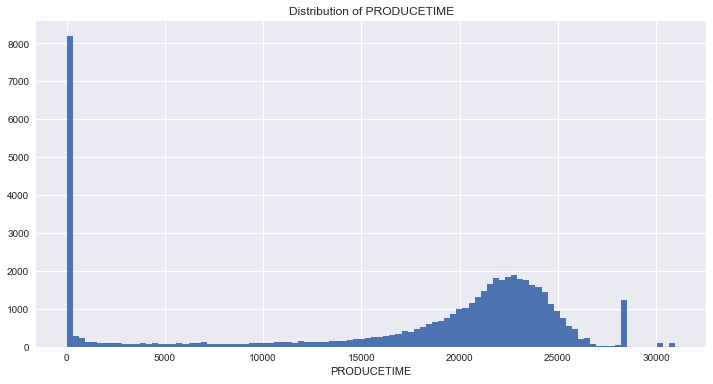

In [8]:
plt.figure(figsize=(12, 6))
plt.hist(tb_20_clear.loc[:, 'PRODUCETIME'], 100)
plt.title('Distribution of PRODUCETIME')  
plt.xlabel('PRODUCETIME')  
plt.show()

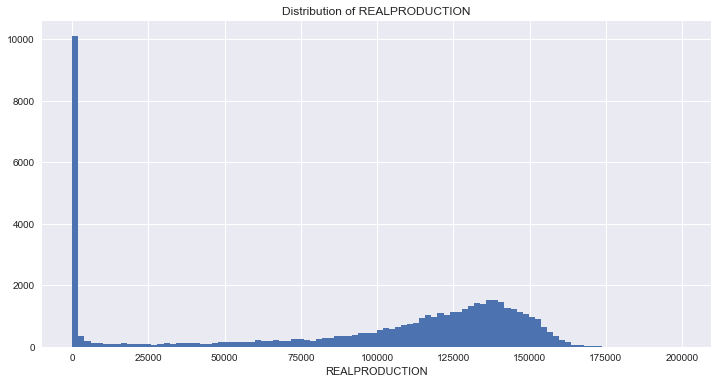

In [9]:
plt.figure(figsize=(12, 6))
plt.hist(tb_20_clear.loc[:, 'REALPRODUCTION'], 100)
plt.title('Distribution of REALPRODUCTION')  
plt.xlabel('REALPRODUCTION')  
plt.show()

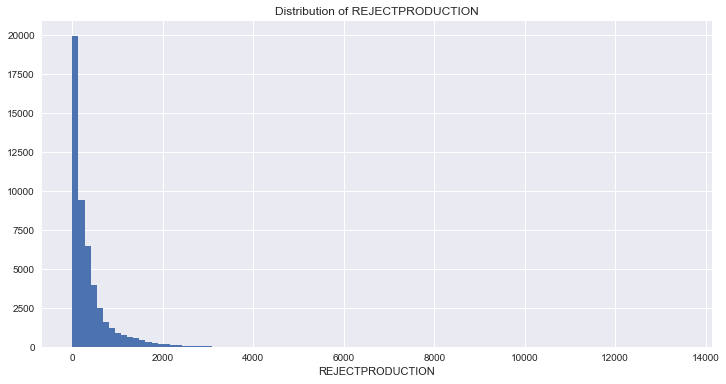

In [10]:
plt.figure(figsize=(12, 6))
plt.hist(tb_20_clear.loc[:, 'REJECTPRODUCTION'], 100)
plt.title('Distribution of REJECTPRODUCTION')  
plt.xlabel('REJECTPRODUCTION')  
plt.show()

## 表22  MT_DC_PM_MP_PT102DATA_CUR  卷接机生产数据

In [11]:
tb_22_new = tb_22[['PRODUCEDATE', 'PB_SHIFT_ID', 'PM_MP_MACHINE_ID', 'PB_PRODUCT_ID', 'GATHERDATETIME', 'TOTALPRODUCTION', 'FILTERTIP',
                   'TOTALWASTE', 'TOTALWASTEPCT', 'EFFMACHINE', 'EFFPRODUCTION', 'MACHINESPEED', 'RUNTIME',
                   'TOTALSTOPTIME', 'TOTALSTOPCNT']]
tb_22_new.head()

,PRODUCEDATE,PB_SHIFT_ID,PM_MP_MACHINE_ID,PB_PRODUCT_ID,GATHERDATETIME,TOTALPRODUCTION,FILTERTIP,TOTALWASTE,TOTALWASTEPCT,EFFMACHINE,EFFPRODUCTION,MACHINESPEED,RUNTIME,TOTALSTOPTIME,TOTALSTOPCNT
0,2015-11-13,1,115,10001586,2015-11-13 15:59:59,2,742,2377,0.09,97.1,97.1,7196,28980,2160,34
1,2015-11-13,1,102,10001586,2015-11-13 16:00:02,2,680,5643,0.19,90.4,90.4,7246,27720,3420,37
2,2015-11-13,1,113,10001586,2015-11-13 15:59:58,3,813,16812,0.59,96.8,103.7,7269,29700,1440,22
3,2015-11-13,1,101,10001586,2015-11-13 16:00:08,3,784,26052,0.86,102.4,102.4,0,28980,2160,12
4,2015-11-13,1,119,10001586,2015-11-13 16:01:06,0,0,1574,0.43,5.8,8.2,6738,2880,28260,26


In [12]:
tb_22_clear = tb_22_new.query('TOTALPRODUCTION < 1000000 & FILTERTIP < 1500000 & TOTALWASTE > 0 & RUNTIME > 0 & TOTALSTOPTIME > 0')

### 单台设备生产数据

In [13]:
tb22_dt = tb_22_clear.query("PM_MP_MACHINE_ID == '114'").sort_values('GATHERDATETIME')
tb22_dt

,PRODUCEDATE,PB_SHIFT_ID,PM_MP_MACHINE_ID,PB_PRODUCT_ID,GATHERDATETIME,TOTALPRODUCTION,FILTERTIP,TOTALWASTE,TOTALWASTEPCT,EFFMACHINE,EFFPRODUCTION,MACHINESPEED,RUNTIME,TOTALSTOPTIME,TOTALSTOPCNT
8347,2016-05-28,1,114,10001586,2016-05-28 15:57:57,135,36663,2094,1.52,4.10,7.10,0,16620,14520,49
8900,2016-05-28,2,114,10001586,2016-05-28 23:52:32,2705,679060,4872,0.18,88.90,90.40,0,25020,3420,27
9052,2016-05-29,3,114,10001586,2016-05-29 07:12:45,2356,592808,6754,0.29,79.20,79.20,0,18360,7680,34
9598,2016-05-29,1,114,10001586,2016-05-29 15:47:09,2725,684564,8004,0.29,91.80,91.80,0,26820,3720,18
9768,2016-05-30,1,114,10001586,2016-05-30 15:54:06,2479,623010,5283,0.21,82.10,69.20,0,23340,5880,32
7484,2016-05-30,2,114,10001586,2016-05-30 23:57:53,3001,753795,6788,0.22,98.60,98.60,0,26160,2580,28
7656,2016-05-31,3,114,10001586,2016-05-31 05:01:24,1460,366961,3996,0.27,71.10,75.50,7035,13380,4800,21
7660,2016-05-31,3,114,10001586,2016-05-31 07:14:09,2270,570461,5995,0.26,76.10,79.30,0,20460,5700,31
11078,2016-05-31,1,114,10001586,2016-05-31 15:57:54,2722,683458,5114,0.19,89.40,89.40,0,27540,3600,23
11084,2016-05-31,2,114,10001586,2016-05-31 22:53:31,2356,591276,4918,0.21,90.80,91.80,0,20820,4080,12


### 单台设备生产数据相关系数

In [14]:
tb22_dt_corr = tb22_dt.corr()
columns = ['TOTALPRODUCTION', 'FILTERTIP', 'TOTALWASTE', 'TOTALWASTEPCT', 'EFFMACHINE', 'EFFPRODUCTION', 'RUNTIME', 'TOTALSTOPTIME', 'TOTALSTOPCNT']

for col in columns:
    print('*' * 50)
    print(col, '相关系数排行：\n', tb22_dt_corr[col].sort_values(ascending=False)[:5])

**************************************************
TOTALPRODUCTION 相关系数排行：
 TOTALPRODUCTION    1.000000
FILTERTIP          0.927376
EFFMACHINE         0.820153
EFFPRODUCTION      0.802193
RUNTIME            0.728801
Name: TOTALPRODUCTION, dtype: float64
**************************************************
FILTERTIP 相关系数排行：
 FILTERTIP          1.000000
TOTALPRODUCTION    0.927376
EFFMACHINE         0.782678
EFFPRODUCTION      0.762347
RUNTIME            0.700769
Name: FILTERTIP, dtype: float64
**************************************************
TOTALWASTE 相关系数排行：
 TOTALWASTE       1.000000
TOTALSTOPCNT     0.341888
TOTALWASTEPCT    0.301123
RUNTIME          0.249356
FILTERTIP        0.188528
Name: TOTALWASTE, dtype: float64
**************************************************
TOTALWASTEPCT 相关系数排行：
 TOTALWASTEPCT    1.000000
TOTALSTOPTIME    0.460472
TOTALWASTE       0.301123
TOTALSTOPCNT     0.159681
PB_SHIFT_ID     -0.047739
Name: TOTALWASTEPCT, dtype: float64
******************************

### 原始数据绘图

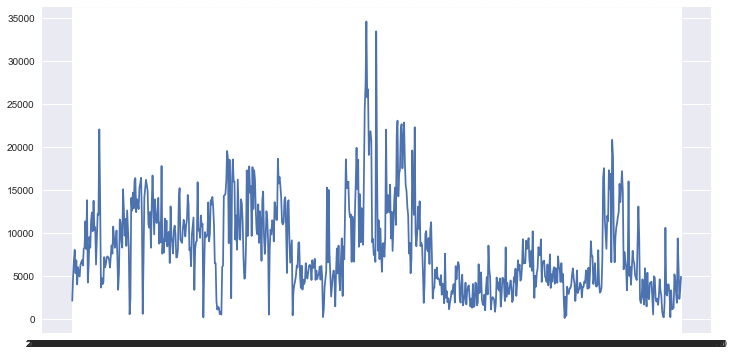

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(tb22_dt['GATHERDATETIME'], tb22_dt['TOTALWASTE'])
plt.show()

### 一阶差分后的数据绘图

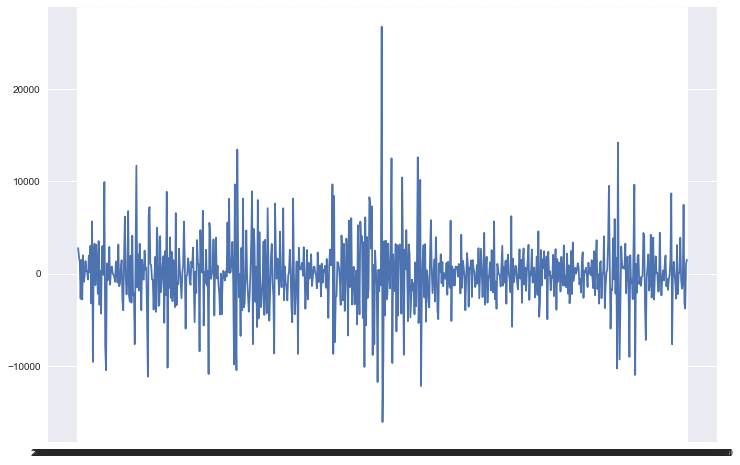

In [16]:
fig = plt.figure(figsize=(12,8))
ax1= fig.add_subplot(111)
diff1 = tb22_dt['TOTALWASTE'].diff(1)
plt.plot(tb22_dt['GATHERDATETIME'], diff1)
plt.show()

### 设备114早班生产数据

In [17]:
tb22_dt1 = tb_22_clear.query("PB_SHIFT_ID == 1 & PM_MP_MACHINE_ID == '114'").sort_values('GATHERDATETIME')
tb22_dt1

,PRODUCEDATE,PB_SHIFT_ID,PM_MP_MACHINE_ID,PB_PRODUCT_ID,GATHERDATETIME,TOTALPRODUCTION,FILTERTIP,TOTALWASTE,TOTALWASTEPCT,EFFMACHINE,EFFPRODUCTION,MACHINESPEED,RUNTIME,TOTALSTOPTIME,TOTALSTOPCNT
8347,2016-05-28,1,114,10001586,2016-05-28 15:57:57,135,36663,2094,1.52,4.10,7.10,0,16620,14520,49
9598,2016-05-29,1,114,10001586,2016-05-29 15:47:09,2725,684564,8004,0.29,91.80,91.80,0,26820,3720,18
9768,2016-05-30,1,114,10001586,2016-05-30 15:54:06,2479,623010,5283,0.21,82.10,69.20,0,23340,5880,32
11078,2016-05-31,1,114,10001586,2016-05-31 15:57:54,2722,683458,5114,0.19,89.40,89.40,0,27540,3600,23
7363,2016-06-02,1,114,10001586,2016-06-02 15:57:52,2952,741485,6181,0.25,89.70,89.70,0,28020,2520,22
8084,2016-06-05,1,114,10001586,2016-06-05 15:57:50,2700,679045,8110,0.30,82.10,82.10,0,26040,4500,39
7557,2016-06-06,1,114,10001586,2016-06-06 15:57:48,2500,628370,4216,0.17,76.00,76.00,0,24180,6360,29
10053,2016-06-07,1,114,10001586,2016-06-07 15:56:43,3162,794157,8263,0.26,96.30,96.30,0,29040,1440,18
10832,2016-06-08,1,114,10001586,2016-06-08 15:57:45,3180,799238,10174,0.32,96.70,96.70,0,28980,1560,25
11503,2016-06-10,1,114,10001586,2016-06-10 15:57:45,3060,769060,10346,0.34,93.00,93.00,397,28200,2340,21


In [18]:
tb22_dt1.describe()

,PB_SHIFT_ID,PM_MP_MACHINE_ID,PB_PRODUCT_ID,TOTALPRODUCTION,FILTERTIP,TOTALWASTE,TOTALWASTEPCT,EFFMACHINE,EFFPRODUCTION,MACHINESPEED,RUNTIME,TOTALSTOPTIME,TOTALSTOPCNT
count,259.0,259.0,259.0,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000
mean,1.0,114.0,10001586.0,2384.054054,603122.706564,8033.359073,0.407452,77.165792,75.661506,1475.559846,17979.799228,6939.150579,32.988417
std,0.0,0.0,0.0,702.868760,179307.969483,5068.681465,0.625515,18.881548,18.813864,2886.550207,7472.610902,4653.018114,13.903455
min,1.0,114.0,10001586.0,19.000000,0.000000,166.000000,0.010000,0.600000,0.800000,0.000000,60.000000,60.000000,2.000000
25%,1.0,114.0,10001586.0,2116.000000,560825.000000,4291.500000,0.180000,73.770000,71.055000,0.000000,13530.000000,3990.000000,24.000000
50%,1.0,114.0,10001586.0,2615.000000,662523.000000,6767.000000,0.310000,82.160000,80.860000,0.000000,17700.000000,5940.000000,31.000000
75%,1.0,114.0,10001586.0,2850.000000,714443.500000,11361.000000,0.470000,87.545000,86.590000,0.000000,24630.000000,8160.000000,40.000000
max,1.0,114.0,10001586.0,3289.000000,825963.000000,26676.000000,6.960000,133.200000,133.200000,8000.000000,29940.000000,27300.000000,99.000000


### 设备114中班生产数据

In [19]:
tb22_dt2 = tb_22_clear.query("PB_SHIFT_ID == 2 & PM_MP_MACHINE_ID == '114'").sort_values('GATHERDATETIME')
tb22_dt2

,PRODUCEDATE,PB_SHIFT_ID,PM_MP_MACHINE_ID,PB_PRODUCT_ID,GATHERDATETIME,TOTALPRODUCTION,FILTERTIP,TOTALWASTE,TOTALWASTEPCT,EFFMACHINE,EFFPRODUCTION,MACHINESPEED,RUNTIME,TOTALSTOPTIME,TOTALSTOPCNT
8900,2016-05-28,2,114,10001586,2016-05-28 23:52:32,2705,679060,4872,0.18,88.90,90.40,0,25020,3420,27
7484,2016-05-30,2,114,10001586,2016-05-30 23:57:53,3001,753795,6788,0.22,98.60,98.60,0,26160,2580,28
11084,2016-05-31,2,114,10001586,2016-05-31 22:53:31,2356,591276,4918,0.21,90.80,91.80,0,20820,4080,12
9467,2016-06-01,2,114,10001586,2016-06-01 23:57:53,2999,753600,6575,0.22,98.50,98.50,7034,26820,1920,31
7371,2016-06-02,2,114,10001586,2016-06-02 23:57:51,2625,661555,8141,0.35,79.80,79.80,0,23520,5220,38
9675,2016-06-03,2,114,10001586,2016-06-03 23:54:09,2942,740270,11333,0.38,90.10,90.10,0,25980,2580,22
8102,2016-06-05,2,114,10001586,2016-06-05 23:57:48,2700,680292,13785,0.51,82.10,82.10,0,24360,4380,34
8808,2016-06-06,2,114,10001586,2016-06-06 23:43:48,2560,642536,6241,0.24,80.20,82.80,0,23520,4380,17
10193,2016-06-07,2,114,10001586,2016-06-07 23:50:28,3130,786597,11413,0.36,96.60,96.60,1009,26940,1380,13
11363,2016-06-08,2,114,10001586,2016-06-08 23:24:35,2594,653504,13716,0.52,84.90,84.90,0,23160,3600,24


In [20]:
tb22_dt2.describe()

,PB_SHIFT_ID,PM_MP_MACHINE_ID,PB_PRODUCT_ID,TOTALPRODUCTION,FILTERTIP,TOTALWASTE,TOTALWASTEPCT,EFFMACHINE,EFFPRODUCTION,MACHINESPEED,RUNTIME,TOTALSTOPTIME,TOTALSTOPCNT
count,263.0,263.0,263.0,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,2.0,114.0,10001586.0,2558.494297,644522.209125,8328.277567,0.363422,81.673308,81.235779,1894.585551,19019.543726,5737.642586,32.212928
std,0.0,0.0,0.0,597.157138,156700.732475,5300.728056,0.393805,15.554443,14.331113,3135.951244,6443.689601,4148.496894,14.617786
min,2.0,114.0,10001586.0,27.000000,0.000000,174.000000,0.040000,0.800000,3.200000,0.000000,60.000000,300.000000,3.000000
25%,2.0,114.0,10001586.0,2396.000000,614333.500000,4177.000000,0.160000,79.510000,78.605000,0.000000,15420.000000,3240.000000,22.000000
50%,2.0,114.0,10001586.0,2720.000000,688817.000000,7167.000000,0.300000,85.250000,84.400000,0.000000,19620.000000,4980.000000,31.000000
75%,2.0,114.0,10001586.0,2945.500000,740845.500000,11552.000000,0.450000,90.020000,89.325000,5891.000000,25020.000000,7020.000000,39.000000
max,2.0,114.0,10001586.0,3283.000000,823903.000000,34553.000000,3.830000,98.600000,98.600000,8000.000000,28020.000000,27480.000000,118.000000


### 设备114夜班生产数据

In [21]:
tb22_dt3 = tb_22_clear.query("PB_SHIFT_ID == 3 & PM_MP_MACHINE_ID == '114'").sort_values('GATHERDATETIME')
tb22_dt3

,PRODUCEDATE,PB_SHIFT_ID,PM_MP_MACHINE_ID,PB_PRODUCT_ID,GATHERDATETIME,TOTALPRODUCTION,FILTERTIP,TOTALWASTE,TOTALWASTEPCT,EFFMACHINE,EFFPRODUCTION,MACHINESPEED,RUNTIME,TOTALSTOPTIME,TOTALSTOPCNT
9052,2016-05-29,3,114,10001586,2016-05-29 07:12:45,2356,592808,6754,0.29,79.20,79.20,0,18360,7680,34
7656,2016-05-31,3,114,10001586,2016-05-31 05:01:24,1460,366961,3996,0.27,71.10,75.50,7035,13380,4800,21
7660,2016-05-31,3,114,10001586,2016-05-31 07:14:09,2270,570461,5995,0.26,76.10,79.30,0,20460,5700,31
8767,2016-06-01,3,114,10001586,2016-06-01 07:17:51,2703,678771,6287,0.26,89.80,89.80,7034,24000,2340,20
9474,2016-06-02,3,114,10001586,2016-06-02 07:16:17,2610,655610,6817,0.26,87.10,87.10,0,23220,3060,17
7511,2016-06-03,3,114,10001586,2016-06-03 07:17:50,2803,703982,8293,0.76,93.10,93.10,7034,24780,1560,9
10051,2016-06-07,3,114,10001586,2016-06-07 07:17:46,2814,707713,9498,0.34,93.50,93.50,7033,24780,1560,30
10823,2016-06-08,3,114,10001586,2016-06-08 07:17:46,2812,707840,12357,0.44,93.40,93.40,7204,24180,2160,22
12040,2016-06-14,3,114,10001586,2016-06-14 07:22:33,2697,677910,3627,0.21,90.70,90.70,7034,23520,2520,33
10936,2016-06-16,3,114,10001586,2016-06-16 07:17:38,2840,713241,5976,0.21,94.40,94.40,7034,24900,1440,14


In [22]:
tb22_dt3.describe()

,PB_SHIFT_ID,PM_MP_MACHINE_ID,PB_PRODUCT_ID,TOTALPRODUCTION,FILTERTIP,TOTALWASTE,TOTALWASTEPCT,EFFMACHINE,EFFPRODUCTION,MACHINESPEED,RUNTIME,TOTALSTOPTIME,TOTALSTOPCNT
count,222.0,222.0,222.0,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000
mean,3.0,114.0,10001586.0,2483.139640,629737.693694,8117.193694,0.352748,81.497342,80.705811,2446.292793,18219.864865,5591.081081,31.013514
std,0.0,0.0,0.0,533.969607,139141.519683,5181.638773,0.305112,13.494764,12.719628,3358.244578,5504.056627,3450.505596,13.736525
min,3.0,114.0,10001586.0,16.000000,0.000000,91.000000,0.030000,0.500000,1.300000,0.000000,120.000000,480.000000,3.000000
25%,3.0,114.0,10001586.0,2301.250000,591137.750000,4252.500000,0.160000,78.087500,76.242500,0.000000,15210.000000,3315.000000,22.000000
50%,3.0,114.0,10001586.0,2639.000000,668841.500000,7183.500000,0.295000,85.520000,83.950000,0.000000,19140.000000,5040.000000,28.000000
75%,3.0,114.0,10001586.0,2829.000000,712828.750000,10851.000000,0.460000,88.925000,88.100000,7033.750000,22830.000000,6945.000000,37.000000
max,3.0,114.0,10001586.0,3200.000000,803508.000000,33403.000000,2.630000,96.400000,96.400000,7700.000000,25380.000000,24780.000000,88.000000


由三个班次的基本统计量可见，早班废品总量和废品率均最高，中班最低。

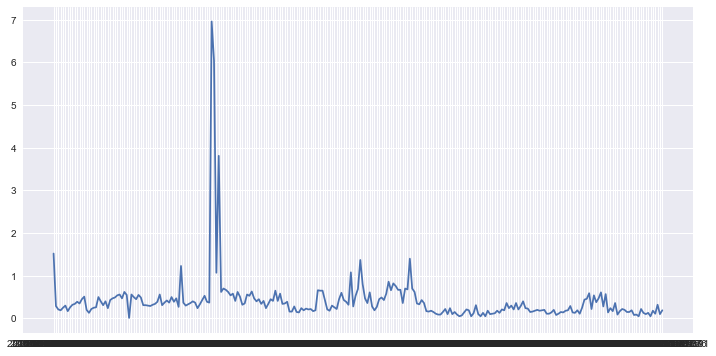

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(tb22_dt1['GATHERDATETIME'], tb22_dt1['TOTALWASTEPCT'])
plt.show()

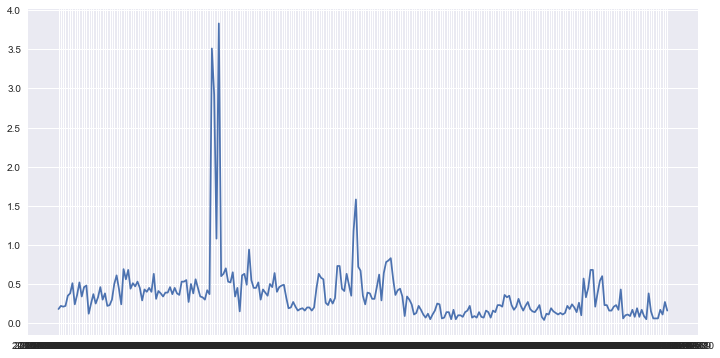

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(tb22_dt2['GATHERDATETIME'], tb22_dt2['TOTALWASTEPCT'])
plt.show()

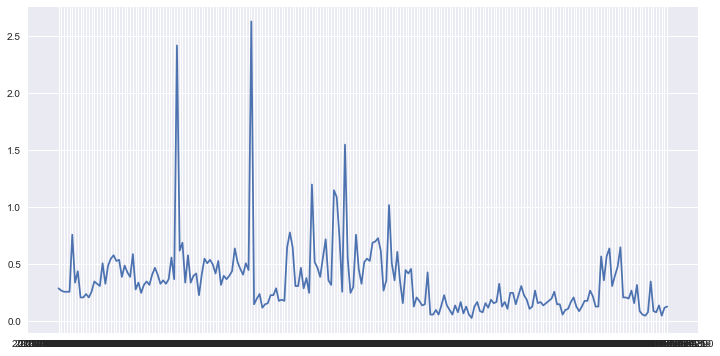

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(tb22_dt3['GATHERDATETIME'], tb22_dt3['TOTALWASTEPCT'])
plt.show()

### 设备114每班次只取最后一条数据：

In [26]:
tb22_dt_last = tb22_dt.groupby(['PRODUCEDATE', 'PB_SHIFT_ID']).apply(lambda x:x.iloc[-1]).sort_values('GATHERDATETIME')
tb22_dt_last

PRODUCEDATE  PB_SHIFT_ID  PM_MP_MACHINE_ID  \
PRODUCEDATE PB_SHIFT_ID                                              
2016-05-28  1            2016-05-28            1               114   
            2            2016-05-28            2               114   
2016-05-29  3            2016-05-29            3               114   
            1            2016-05-29            1               114   
2016-05-30  1            2016-05-30            1               114   
            2            2016-05-30            2               114   
2016-05-31  3            2016-05-31            3               114   
            1            2016-05-31            1               114   
            2            2016-05-31            2               114   
2016-06-01  3            2016-06-01            3               114   
            2            2016-06-01            2               114   
2016-06-02  3            2016-06-02            3               114   
            1            2016-06-02            1               114   
            2            2016-06-02            2               114   
2016-06-03  3            2016-06-03            3               114   
            2            2016-06-03            2               114   
2016-06-05  1            2016-06-05            1               114   
            2            2016-06-05            2               114   
2016-06-06  1            2016-06-06            1               114   
            2            2016-06-06            2               114   
2016-06-07  3            2016-06-07            3               114   
            1            2016-06-07            1               114   
            2            2016-06-07            2               114   
2016-06-08  3            2016-06-08            3               114   
            1            2016-06-08            1               114   
            2            2016-06-08            2               114   
2016-06-10  1            2016-06-10            1               114   
            2            2016-06-10            2               114   
2016-06-11  1            2016-06-11            1               114   
            2            2016-06-11            2               114   
...                             ...          ...               ...   
2017-07-12  2            2017-07-12            2               114   
2017-07-13  3            2017-07-13            3               114   
            1            2017-07-13            1               114   
            2            2017-07-13            2               114   
2017-07-14  3            2017-07-14            3               114   
            2            2017-07-14            2               114   
2017-07-15  3            2017-07-15            3               114   
            1            2017-07-15            1               114   
            2            2017-07-15            2               114   
2017-07-17  1            2017-07-17            1               114   
            2            2017-07-17            2               114   
2017-07-18  3            2017-07-18            3               114   
            1            2017-07-18            1               114   
            2            2017-07-18            2               114   
2017-07-19  3            2017-07-19            3               114   
            1            2017-07-19            1               114   
            2            2017-07-19            2               114   
2017-07-20  1            2017-07-20            1               114   
            2            2017-07-20            2               114   
2017-07-21  1            2017-07-21            1               114   
            2            2017-07-21            2               114   
2017-07-24  1            2017-07-24            1               114   
            2            2017-07-24            2               114   
2017-07-25  1            2017-07-25            1               114   
            2            2017-07-2

### 设备114生产数据回归分析

### 数据预处理

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X = tb22_dt_last.drop(columns=['PRODUCEDATE', 'PB_SHIFT_ID', 'PM_MP_MACHINE_ID', 'PB_PRODUCT_ID', 'GATHERDATETIME','TOTALWASTEPCT', 'MACHINESPEED'])
y = tb22_dt_last['TOTALWASTEPCT']
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

scaler1 = MinMaxScaler()

X_scaler1 = scaler1.fit_transform(X)
y_scaler1 = scaler1.fit_transform(y.reshape(-1, 1))

scaler2 = StandardScaler()

X_scaler2 = scaler2.fit_transform(X)
y_scaler2 = scaler2.fit_transform(y.reshape(-1, 1))

Xtrain, Xtest, ytrain, ytest = train_test_split(X_scaler2, y_scaler2, test_size=0.2, random_state=666)

### 支持向量机

In [28]:
%%time

from sklearn.svm import SVR

# Create linear regression object
svr = SVR(C=100, gamma=0.1)
 
# Train the model using the training sets and check score
svr.fit(Xtrain, ytrain.ravel())
svr.score(Xtrain, ytrain)
 
# Equation coefficient and Intercept
# print('Coefficient: n', svr.coef_)
print('Intercept: n', svr.intercept_)
 
#Predict Output
predicted= svr.predict(Xtest)

Intercept: n [ 0.36387034]
CPU times: user 93.5 ms, sys: 17.4 ms, total: 111 ms
Wall time: 165 ms


In [29]:
svr.score(Xtrain, ytrain)

0.87937642967712004

In [30]:
svr.score(Xtest, ytest)

0.8324233076356865

In [31]:
from sklearn import metrics
# 用scikit-learn计算MSE
print ("MSE:",metrics.mean_squared_error(ytest, predicted))
# 用scikit-learn计算RMSE
print ("RMSE:",np.sqrt(metrics.mean_squared_error(ytest, predicted)))

from sklearn.model_selection import cross_val_predict, cross_val_score
predicted = cross_val_predict(svr, X_scaler2, y_scaler2.ravel(), cv=10)
# 用scikit-learn计算MSE
print ("MSE:",metrics.mean_squared_error(y_scaler2, predicted))
# 用scikit-learn计算RMSE
print ("RMSE:",np.sqrt(metrics.mean_squared_error(y_scaler2, predicted)))

MSE: 0.177109317338
RMSE: 0.42084357823
MSE: 0.919833001091
RMSE: 0.959079246512


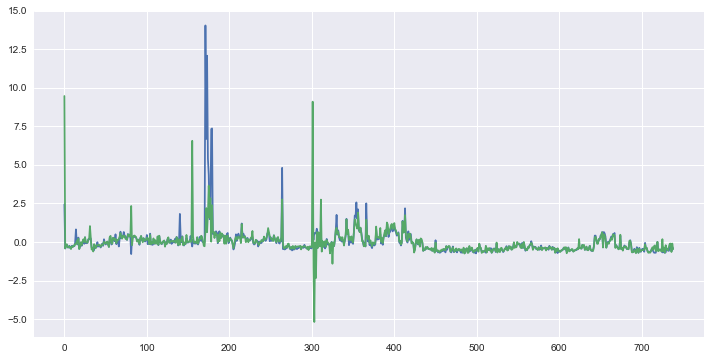

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(y_scaler2)
plt.plot(predicted)
plt.show()

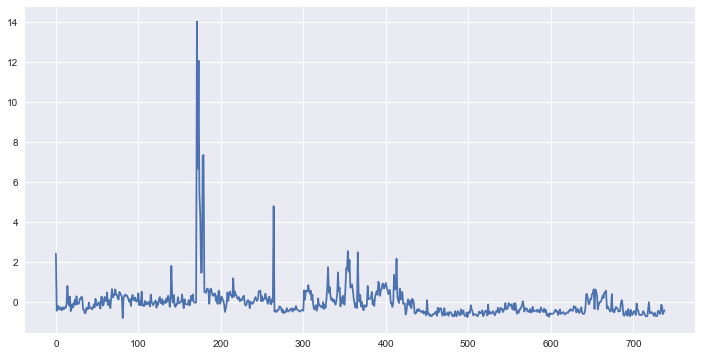

CPU times: user 269 ms, sys: 15.1 ms, total: 284 ms
Wall time: 277 ms


In [33]:
%%time
plt.figure(figsize=(12, 6))
plt.plot(y_scaler2)
plt.show()

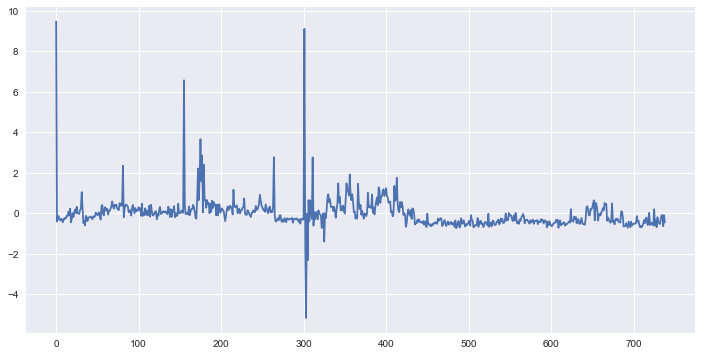

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(predicted)
plt.show()

### 随机森林

In [35]:
from sklearn.ensemble import RandomForestRegressor

# Create linear regression object
rf = RandomForestRegressor()
 
# Train the model using the training sets and check score
rf.fit(Xtrain, ytrain.ravel())
rf.score(Xtrain, ytrain)
 
# Equation coefficient and Intercept
# print('Coefficient: n', rf.coef_)
# print('Intercept: n', rf.intercept_)
 
#Predict Output
predicted= rf.predict(Xtest)

In [36]:
rf.score(Xtrain, ytrain)

0.92852721497606949

In [37]:
rf.score(Xtest, ytest)

0.34732223093927728

In [38]:
from sklearn import metrics
# 用scikit-learn计算MSE
print ("MSE:",metrics.mean_squared_error(y_test, predicted))
# 用scikit-learn计算RMSE
print ("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predicted)))

from sklearn.model_selection import cross_val_predict, cross_val_score
predicted = cross_val_predict(rf, X_scaler2, y_scaler2.ravel(), cv=10)
# 用scikit-learn计算MSE
print ("MSE:",metrics.mean_squared_error(y_scaler2, predicted))
# 用scikit-learn计算RMSE
print ("RMSE:",np.sqrt(metrics.mean_squared_error(y_scaler2, predicted)))

MSE: 0.382259414751
RMSE: 0.618271311603
MSE: 0.959625409217
RMSE: 0.979604720904


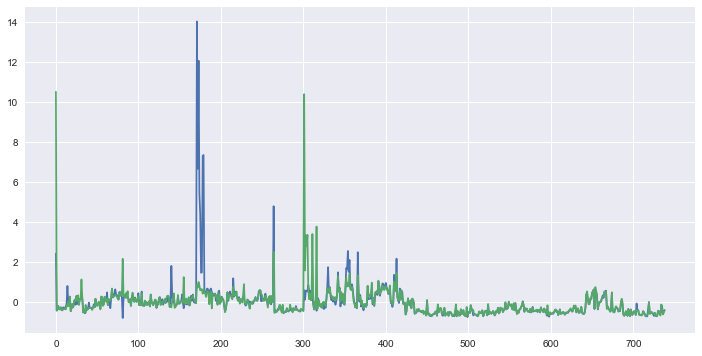

In [39]:
plt.figure(figsize=(12, 6))
plt.plot(y_scaler2)
plt.plot(predicted)
plt.show()

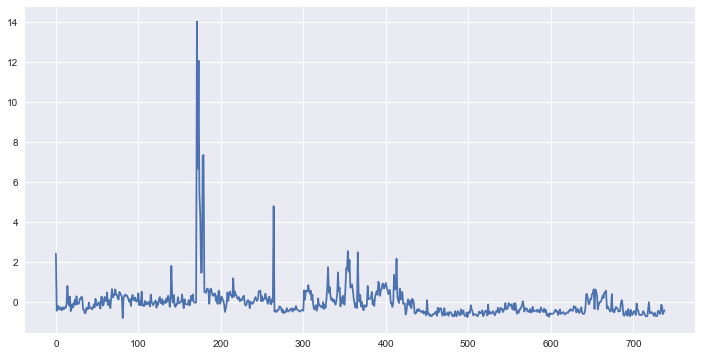

CPU times: user 267 ms, sys: 10.7 ms, total: 278 ms
Wall time: 284 ms


In [40]:
%%time
plt.figure(figsize=(12, 6))
plt.plot(y_scaler2)
plt.show()

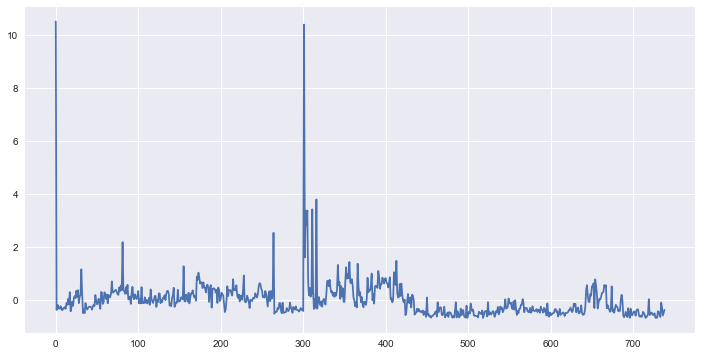

In [41]:
plt.figure(figsize=(12, 6))
plt.plot(predicted)
plt.show()

## 表46、47  TEST_DATA  检测数据

In [42]:
tb_46_new = tb_46[['MACH_ID', 'TEST_ID', 'WEIGHT_VALUE', 'CIRCLE_VALUE', 'LENGTH_VALUE', 'PD_VALUE']]
tb_46_new.head()

,MACH_ID,TEST_ID,WEIGHT_VALUE,CIRCLE_VALUE,LENGTH_VALUE,PD_VALUE
0,test1,2015-10-28 09:16:45OM-VA,0.528,17.045092,97.210899,1.793685
1,test1,2015-10-28 09:16:45OM-VA,0.543,17.025764,97.003197,1.808758
2,test1,2015-10-28 09:16:45OM-VA,0.540,16.983648,96.938400,1.862607
3,test1,2015-10-28 09:16:45OM-VA,0.517,16.937761,96.846497,1.824378
4,test1,2015-10-28 09:26:22OM-VA,0.571,16.995275,97.066200,1.940983


In [43]:
tb_47_new = tb_47[['MACH_ID', 'TEST_ID', 'SAMPLE_NAME', 'LINE_NAME']]
tb_47_new.head()

,MACH_ID,TEST_ID,SAMPLE_NAME,LINE_NAME
0,test5,2015-09-30 08:23:12,利群（新版）,15.0
1,test5,2015-09-30 08:36:33,利群（新版）,13.0
2,test5,2015-10-05 18:11:39,利群（新版）,13.0
3,test5,2015-10-05 18:28:22,真龙（珍品）,16.0
4,test5,2015-10-05 19:24:29,利群（新版）,13.0


In [44]:
droped = tb_46_new[(tb_46_new['WEIGHT_VALUE'] <= 0) | (tb_46_new['CIRCLE_VALUE'] <= 0) | 
                   (tb_46_new['LENGTH_VALUE'] <= 0) | (tb_46_new['PD_VALUE'] <= 0) | 
                  (tb_46_new['WEIGHT_VALUE'] > 10) | (tb_46_new['CIRCLE_VALUE'] > 100) | 
                   (tb_46_new['LENGTH_VALUE'] > 100) | (tb_46_new['PD_VALUE'] > 10)]

In [45]:
tb_46_clear = tb_46_new.append(droped).drop_duplicates(keep=False)
tb_46_clear.head()

,MACH_ID,TEST_ID,WEIGHT_VALUE,CIRCLE_VALUE,LENGTH_VALUE,PD_VALUE
0,test1,2015-10-28 09:16:45OM-VA,0.528,17.045092,97.210899,1.793685
1,test1,2015-10-28 09:16:45OM-VA,0.543,17.025764,97.003197,1.808758
2,test1,2015-10-28 09:16:45OM-VA,0.540,16.983648,96.938400,1.862607
3,test1,2015-10-28 09:16:45OM-VA,0.517,16.937761,96.846497,1.824378
4,test1,2015-10-28 09:26:22OM-VA,0.571,16.995275,97.066200,1.940983


In [46]:
tb_46_mg = pd.merge(tb_46_clear, tb_47_new, how='left')
tb_46_mg.head()

,MACH_ID,TEST_ID,WEIGHT_VALUE,CIRCLE_VALUE,LENGTH_VALUE,PD_VALUE,SAMPLE_NAME,LINE_NAME
0,test1,2015-10-28 09:16:45OM-VA,0.528,17.045092,97.210899,1.793685,真龙(凌云)1401,6.0
1,test1,2015-10-28 09:16:45OM-VA,0.543,17.025764,97.003197,1.808758,真龙(凌云)1401,6.0
2,test1,2015-10-28 09:16:45OM-VA,0.540,16.983648,96.938400,1.862607,真龙(凌云)1401,6.0
3,test1,2015-10-28 09:16:45OM-VA,0.517,16.937761,96.846497,1.824378,真龙(凌云)1401,6.0
4,test1,2015-10-28 09:26:22OM-VA,0.571,16.995275,97.066200,1.940983,真龙(凌云)1401,6.0


### 将质量数据和设备ID关联起来

In [47]:
machine = pd.read_csv('MT_PB_MACHINE.csv')[['PM_MP_MACHINE_ID', 'DC_PB_MACHINEGROUPID']]
machine.rename(columns={'DC_PB_MACHINEGROUPID':'LINE_NAME'}, inplace=True)
machine = machine.query('PM_MP_MACHINE_ID < 200') # 只选卷接机设备
machine.head()

,PM_MP_MACHINE_ID,LINE_NAME
6,121,21
7,122,22
8,123,23
9,124,24
15,125,24


In [48]:
tb46 = pd.merge(tb_46_mg, machine, how='left')
tb46.head()

,MACH_ID,TEST_ID,WEIGHT_VALUE,CIRCLE_VALUE,LENGTH_VALUE,PD_VALUE,SAMPLE_NAME,LINE_NAME,PM_MP_MACHINE_ID
0,test1,2015-10-28 09:16:45OM-VA,0.528,17.045092,97.210899,1.793685,真龙(凌云)1401,6,106.0
1,test1,2015-10-28 09:16:45OM-VA,0.543,17.025764,97.003197,1.808758,真龙(凌云)1401,6,106.0
2,test1,2015-10-28 09:16:45OM-VA,0.540,16.983648,96.938400,1.862607,真龙(凌云)1401,6,106.0
3,test1,2015-10-28 09:16:45OM-VA,0.517,16.937761,96.846497,1.824378,真龙(凌云)1401,6,106.0
4,test1,2015-10-28 09:26:22OM-VA,0.571,16.995275,97.066200,1.940983,真龙(凌云)1401,6,106.0


### 选取设备114的质量数据进行分析

In [49]:
tb46_dt = tb46.query("PM_MP_MACHINE_ID == 114").sort_values('TEST_ID')
tb46_dt

,MACH_ID,TEST_ID,WEIGHT_VALUE,CIRCLE_VALUE,LENGTH_VALUE,PD_VALUE,SAMPLE_NAME,LINE_NAME,PM_MP_MACHINE_ID
68456,test2,2012-08-19 02:15:55,0.887,24.511419,84.365097,1.076073,真龙（软娇子）,14,114.0
57968,test2,2012-08-19 02:15:55,0.927,24.521954,84.010796,1.110270,真龙（软娇子）,14,114.0
57969,test2,2012-08-19 02:15:55,0.908,24.501202,84.013496,1.139207,真龙（软娇子）,14,114.0
57970,test2,2012-08-19 02:15:55,0.857,24.505289,84.331696,1.094487,真龙（软娇子）,14,114.0
68457,test2,2012-08-19 02:15:55,0.891,24.467875,84.086197,1.170774,真龙（软娇子）,14,114.0
68455,test2,2012-08-19 02:15:55,0.921,24.579332,83.990295,1.172090,真龙（软娇子）,14,114.0
57971,test2,2012-08-19 02:15:55,0.903,24.470860,83.935196,1.147099,真龙（软娇子）,14,114.0
57965,test2,2012-08-19 02:15:55,0.922,24.555752,83.447197,1.108955,真龙（软娇子）,14,114.0
57964,test2,2012-08-19 02:15:55,0.928,24.546635,84.154198,1.130000,真龙（软娇子）,14,114.0
57967,test2,2012-08-19 02:15:55,0.882,24.416939,84.277596,1.051082,真龙（软娇子）,14,114.0


设备114生产的所有品牌：

In [50]:
tb46_dt.groupby('SAMPLE_NAME').size().sort_values(ascending=False)

SAMPLE_NAME
利群（新版）         89722
真龙（娇子）1502     20844
真龙（珍品）         13116
真龙（娇子）1501      8970
雄狮（硬）           8120
利群(新版)          2544
真龙（天翔）1501      2178
利群[新版]          1311
真龙（天翔）           674
真龙（娇子)           510
雄狮(硬）            452
真龙(珍品)           381
真龙（娇子)1502       334
真龙（软娇子）          314
真龙（娇子）C          260
真龙(娇子)            90
雄狮[硬]             80
真龙珍品1501          64
真龙（娇子)重量          59
真龙(软娇子)1601       30
利群(无硬度)           20
大红鹰（软蓝）            4
大红鷹(软蓝)无硬度         2
dtype: int64

选取利群（新版）系列品牌的质量数据进行分析：

In [51]:
tb46_dt_lq = tb46_dt.query("SAMPLE_NAME == ['利群（新版）']")
tb46_dt_lq

,MACH_ID,TEST_ID,WEIGHT_VALUE,CIRCLE_VALUE,LENGTH_VALUE,PD_VALUE,SAMPLE_NAME,LINE_NAME,PM_MP_MACHINE_ID
24714,test2,2015-09-24 03:14:52,0.846,24.426519,84.168190,0.991429,利群（新版）,14,114.0
24715,test2,2015-09-24 03:14:52,0.903,24.501156,83.883492,1.048719,利群（新版）,14,114.0
38259,test5,2015-09-24 03:14:52,0.902,24.521896,84.203590,0.998091,利群（新版）,14,114.0
24724,test2,2015-09-24 03:14:52,0.870,24.499586,84.117493,1.030067,利群（新版）,14,114.0
24719,test2,2015-09-24 03:14:52,0.873,24.409391,83.823288,1.003420,利群（新版）,14,114.0
24720,test2,2015-09-24 03:14:52,0.915,24.565422,84.044495,1.051384,利群（新版）,14,114.0
24721,test2,2015-09-24 03:14:52,0.878,24.469730,84.014793,0.982103,利群（新版）,14,114.0
24722,test2,2015-09-24 03:14:52,0.906,24.581762,84.005791,1.004753,利群（新版）,14,114.0
24723,test2,2015-09-24 03:14:52,0.873,24.364294,84.148087,0.984768,利群（新版）,14,114.0
24725,test2,2015-09-24 03:14:52,0.885,24.541540,83.939690,1.044722,利群（新版）,14,114.0


对设备114生产的利群（新版）系列品牌的质量数据进行分组平均：

In [52]:
tb46_dt_mean = tb46_dt_lq.groupby('TEST_ID').mean()

# 基于3sigma的异常数据预警
n = 3
li = ['WEIGHT_VALUE', 'CIRCLE_VALUE', 'LENGTH_VALUE', 'PD_VALUE']
data_dict = dict()
for i in li:
    mean = np.mean(tb46_dt_mean[i])
    std = np.std(tb46_dt_mean[i])
    threshold1 = mean - n * std
    threshold2 = mean + n * std
    data_dict[i] = [threshold1, threshold2]

tb46_dt_mean = tb46_dt_mean[(tb46_dt_mean['WEIGHT_VALUE'] >= data_dict['WEIGHT_VALUE'][0]) & (tb46_dt_mean['WEIGHT_VALUE'] <= data_dict['WEIGHT_VALUE'][1]) &
                            (tb46_dt_mean['CIRCLE_VALUE'] >= data_dict['CIRCLE_VALUE'][0]) & (tb46_dt_mean['CIRCLE_VALUE'] <= data_dict['CIRCLE_VALUE'][1]) &
                            (tb46_dt_mean['LENGTH_VALUE'] >= data_dict['LENGTH_VALUE'][0]) & (tb46_dt_mean['LENGTH_VALUE'] <= data_dict['LENGTH_VALUE'][1]) &
                            (tb46_dt_mean['PD_VALUE'] >= data_dict['PD_VALUE'][0]) & (tb46_dt_mean['PD_VALUE'] <= data_dict['PD_VALUE'][1])]

tb46_dt_mean

,WEIGHT_VALUE,CIRCLE_VALUE,LENGTH_VALUE,PD_VALUE,PM_MP_MACHINE_ID
TEST_ID,,,,,
2015-09-24 03:14:52,0.894950,24.504118,84.029645,1.025204,114.0
2015-09-24 04:13:58,0.899000,24.472032,84.021701,1.056247,114.0
2015-09-24 05:38:34,0.893050,24.473815,84.055862,1.039793,114.0
2015-09-24 05:46:02,0.901750,24.504479,84.115098,1.064507,114.0
2015-09-24 06:19:26,0.896100,24.533627,84.025187,1.038061,114.0
2015-09-24 06:56:54,0.895650,24.499144,84.160656,1.055381,114.0
2015-09-24 08:21:59,0.916550,24.475002,84.162721,1.106609,114.0
2015-09-24 09:15:44,0.879750,24.411591,84.024927,1.072290,114.0
2015-09-24 09:42:50,0.900850,24.500551,84.014916,1.072022,114.0


In [53]:
tb46_dt_mean.describe()

,WEIGHT_VALUE,CIRCLE_VALUE,LENGTH_VALUE,PD_VALUE,PM_MP_MACHINE_ID
count,4312.000000,4312.000000,4312.000000,4312.000000,4312.0
mean,0.896718,24.494723,84.016115,1.076385,114.0
std,0.006976,0.040864,0.110311,0.022704,0.0
min,0.873500,24.316615,83.401024,1.003444,114.0
25%,0.892450,24.471049,83.941574,1.061384,114.0
50%,0.896450,24.494781,84.006201,1.075516,114.0
75%,0.900600,24.517272,84.078016,1.091319,114.0
max,0.920300,25.343259,84.837001,1.150959,114.0


设备114生产的利群（新版）系列品牌的质量数据（平均处理）绘图：

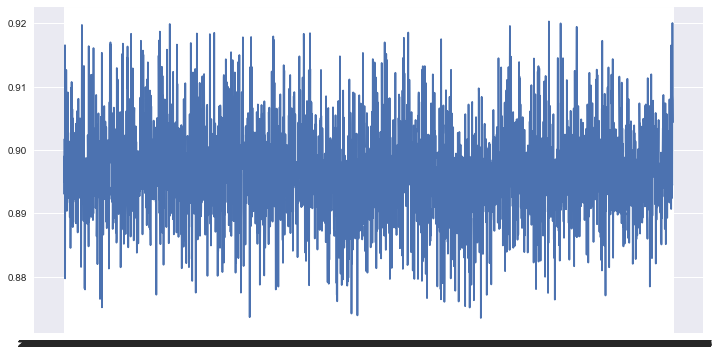

In [54]:
plt.figure(figsize=(12, 6))
plt.plot(tb46_dt_mean['WEIGHT_VALUE'])
plt.show()

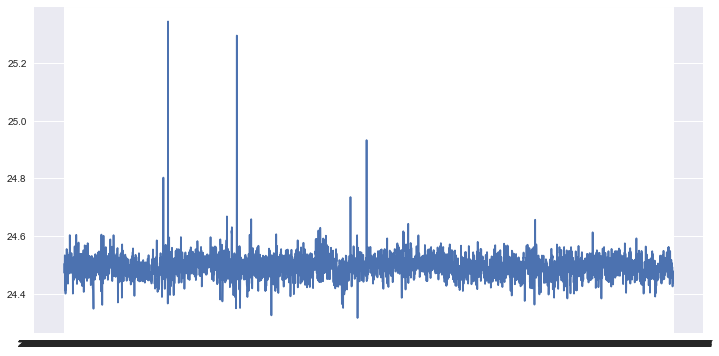

In [55]:
plt.figure(figsize=(12, 6))
plt.plot(tb46_dt_mean['CIRCLE_VALUE'])
plt.show()

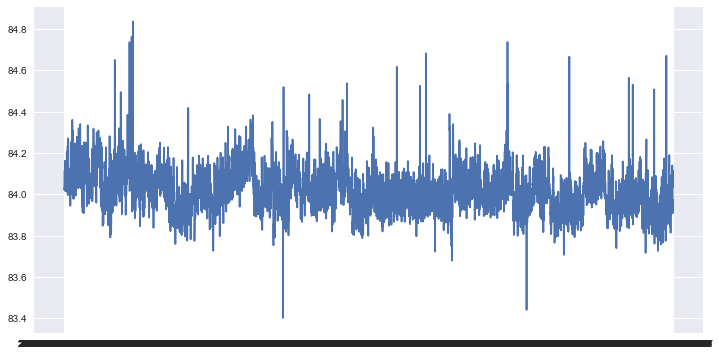

In [56]:
plt.figure(figsize=(12, 6))
plt.plot(tb46_dt_mean['LENGTH_VALUE'])
plt.show()

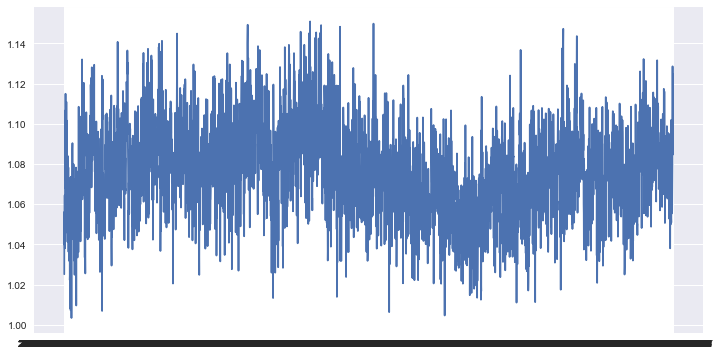

In [57]:
plt.figure(figsize=(12, 6))
plt.plot(tb46_dt_mean['PD_VALUE'])
plt.show()

### 判断数据集是否属于正态分布

In [58]:
from scipy import stats

x = tb46_dt_mean['WEIGHT_VALUE']
k2, p = stats.normaltest(x)
alpha = 1e-3
print("p = {:g}".format(p))
if p < alpha:  # 零假设: x来自正态分布
    print("零假设能被拒绝")
else:
    print("零假设不能被拒绝")

p = 5.14485e-16
零假设能被拒绝


In [59]:
stats.kstest(x, cdf='norm')

KstestResult(statistic=0.80880469645959885, pvalue=0.0)

设备114生产的利群（新版）系列品牌的重量值（平均处理）正态性检验：

/Users/jing/.virtualenvs/pydata/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


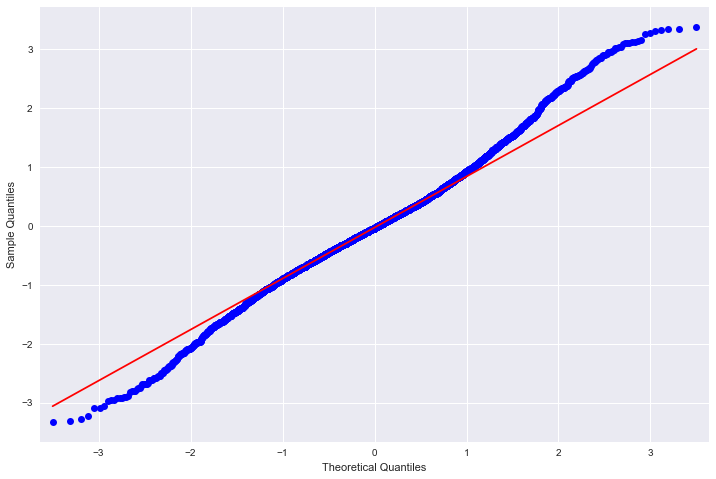

In [60]:
from statsmodels.api import qqplot
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(tb46_dt_mean['WEIGHT_VALUE'], line='q', ax=ax, fit=True)

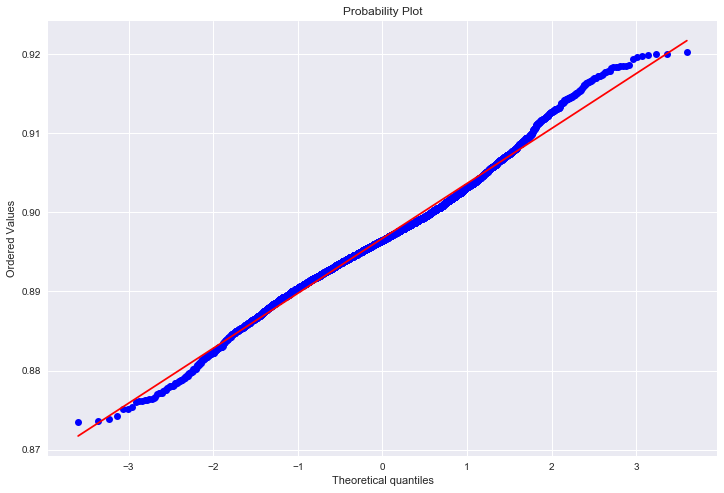

In [61]:
from scipy.stats import probplot
f = plt.figure(figsize=(12, 8))
ax = f.add_subplot(111)
probplot(tb46_dt_mean['WEIGHT_VALUE'], plot=ax);

### 基于3sigma的异常数据预警代码

In [62]:
# %%time

# n = 3
# data_x = tb46_dt_mean[['WEIGHT_VALUE']].index
# data_y = tb46_dt_mean['WEIGHT_VALUE']
# ymean = np.mean(data_y)
# ystd = np.std(data_y)
# threshold1 = ymean - n * ystd
# threshold2 = ymean + n * ystd

# outlier = [] #将异常值保存
# outlier_x = []

# for i in range(0, len(data_y)):
#     if (data_y[i] < threshold1)|(data_y[i] > threshold2):
#         outlier.append(data_y[i])
#         outlier_x.append(data_x[i])
#     else:
#         continue

# outlier = np.round(outlier, 3)

# # print('\n异常数据如下：\n')
# # print(outlier)
# # print(outlier_x)

# plt.figure(figsize=(16, 10))
# plt.plot(data_x, data_y)
# plt.plot(outlier_x, outlier, 'ro')
# for j in range(len(outlier)):
#     plt.annotate(outlier[j], xy=(outlier_x[j], outlier[j]), xytext=(outlier_x[j],outlier[j]))
# plt.show()

### 基于箱型图的异常数据预警代码

In [63]:
# %%time

# data_y = tb46_dt_mean['WEIGHT_VALUE']
# data_x = tb46_dt_mean[['WEIGHT_VALUE']].index

# statistics = data_y.describe() #保存基本统计量
# IQR = statistics.loc['75%']-statistics.loc['25%']   #四分位数间距
# QL = statistics.loc['25%']  #下四分位数
# QU = statistics.loc['75%']  #上四分位数
# threshold1 = QL - 1.5 * IQR #下阈值
# threshold2 = QU + 1.5 * IQR #上阈值
# outlier = [] #将异常值保存
# outlier_x = []

# for i in range(0, len(data_y)):
#     if (data_y[i] < threshold1)|(data_y[i] > threshold2):
#         outlier.append(data_y[i])
#         outlier_x.append(data_x[i])
#     else:
#         continue

# outlier = np.round(outlier, 3)

# # print('\n异常数据如下：\n')
# # print(outlier)
# # print(outlier_x)

# plt.figure(figsize=(16, 10))
# plt.plot(data_x, data_y)
# plt.plot(outlier_x, outlier, 'ro')
# for j in range(len(outlier)):
#     plt.annotate(outlier[j], xy=(outlier_x[j], outlier[j]), xytext=(outlier_x[j],outlier[j]))
# plt.show()

### 单台设备质量数据回归分析

### 数据预处理

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X = tb46_dt_mean[['CIRCLE_VALUE', 'LENGTH_VALUE', 'PD_VALUE']]
y = tb46_dt_mean['WEIGHT_VALUE']
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

scaler1 = MinMaxScaler()

X_scaler1 = scaler1.fit_transform(X)
y_scaler1 = scaler1.fit_transform(y.reshape(-1, 1))

scaler2 = StandardScaler()

X_scaler2 = scaler2.fit_transform(X)
y_scaler2 = scaler2.fit_transform(y.reshape(-1, 1))

Xtrain, Xtest, ytrain, ytest = train_test_split(X_scaler2, y_scaler2, test_size=0.2, random_state=666)

### 支持向量机

In [65]:
from sklearn.svm import SVR

# Create linear regression object
svr = SVR(C=100, epsilon=1, gamma=0.01)
 
# Train the model using the training sets and check score
svr.fit(Xtrain, ytrain.ravel())
svr.score(Xtrain, ytrain.ravel())
 
# Equation coefficient and Intercept
# print('Coefficient: n', svr.coef_)
print('Intercept: n', svr.intercept_)
 
#Predict Output
predicted= svr.predict(Xtest)

Intercept: n [-1.17241761]


In [66]:
svr.score(Xtrain, ytrain)

0.33101079928446037

In [67]:
svr.score(Xtest, ytest)

0.30428813624590922

In [68]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(SVR(),
                    param_grid={"C":[0.1, 1, 10, 100],
                                "gamma":[1, 0.1, 0.01],
                                "epsilon":[0.1, 1, 10]},
                    cv=10)
grid.fit(Xtrain, ytrain.ravel())
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 100, 'epsilon': 1, 'gamma': 0.01} with a score of 0.32


### 数据平滑处理

WEIGHTS [ 0.          0.11697778  0.41317591  0.75        0.96984631  0.96984631
  0.75        0.41317591  0.11697778  0.        ]


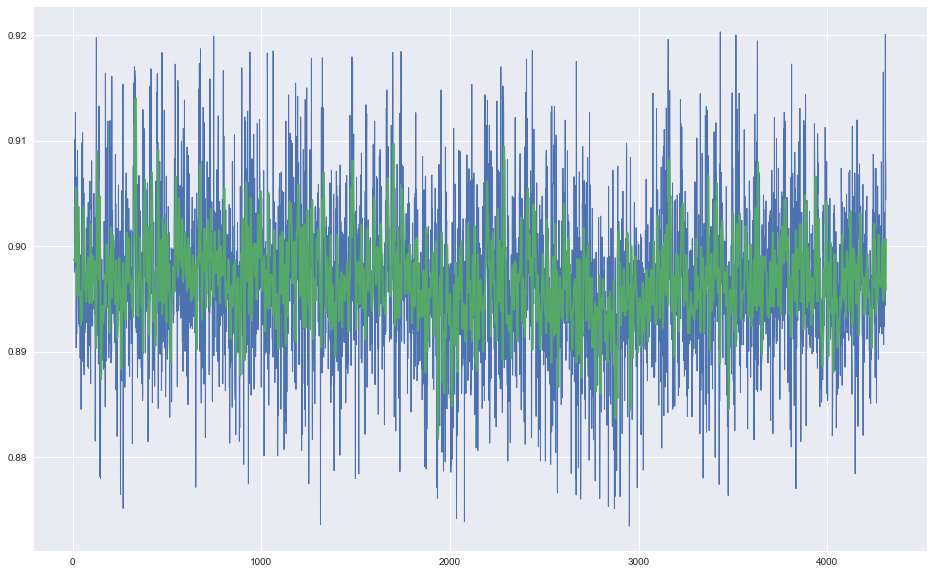

In [69]:
N = 10
weights = np.hanning(N)
print("WEIGHTS",weights)

c = tb46_dt_mean['WEIGHT_VALUE']
sam = np.convolve(weights/weights.sum(),c)[N-1:-N+1]
t = np.arange(N-1,len(c))

plt.figure(figsize=(16, 10))
plt.plot(t,c[N-1:],lw=1.0)
plt.plot(t,sam,lw=2.0)
plt.show()

### 随机森林

In [70]:
from sklearn.ensemble import RandomForestRegressor

# Create linear regression object
rf = RandomForestRegressor(n_estimators=20,
                                                    max_depth=7,
                                                    min_samples_split=80,
                                                    min_samples_leaf=10,
                                                    max_features=3,
                                                   oob_score=True,
                                                   random_state=10)
 
# Train the model using the training sets and check score
rf.fit(Xtrain, ytrain.ravel())
rf.score(Xtrain, ytrain)
 
# Equation coefficient and Intercept
# print('Coefficient: n', rf.coef_)
# print('Intercept: n', rf.intercept_)
 
#Predict Output
predicted= rf.predict(Xtest)

In [71]:
rf.oob_score_

0.30097488146565632

In [72]:
rf.score(Xtrain, ytrain)

0.39153795971051619

In [73]:
rf.score(Xtest, ytest)

0.29757572358305173

In [74]:
from sklearn import metrics
# 用scikit-learn计算MSE
print ("MSE:",metrics.mean_squared_error(ytest, predicted))
# 用scikit-learn计算RMSE
print ("RMSE:",np.sqrt(metrics.mean_squared_error(ytest, predicted)))

from sklearn.model_selection import cross_val_predict, cross_val_score
predicted = cross_val_predict(rf, X_scaler2, y_scaler2.ravel(), cv=10)
# 用scikit-learn计算MSE
print ("MSE:",metrics.mean_squared_error(y_scaler2, predicted))
# 用scikit-learn计算RMSE
print ("RMSE:",np.sqrt(metrics.mean_squared_error(y_scaler2, predicted)))

MSE: 0.704990064268
RMSE: 0.839636864524
MSE: 0.71030983541
RMSE: 0.842798810755


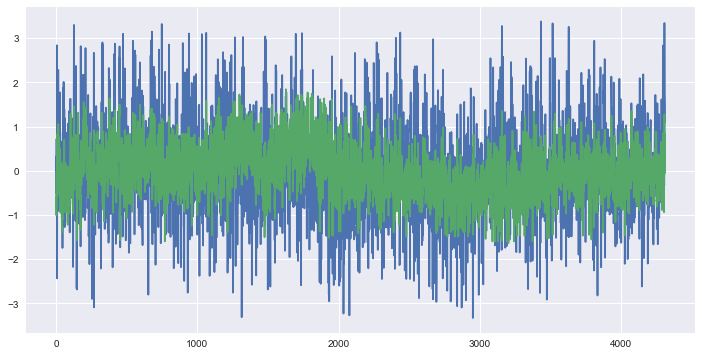

In [75]:
plt.figure(figsize=(12, 6))
plt.plot(y_scaler2)
plt.plot(predicted)
plt.show()

## 表21  MT_DC_PM_MP_GD1057DATA_CUR  包装机剔除数据
## 表23  MT_DC_PM_MP_PT1057DATA_CUR  卷接机剔除数据

### 剔除代码对应表

In [76]:
rejectname = pd.read_csv('MT_DC_PB_REJECTCODE.csv')[['PM_MP_REJECTCODE_ID', 'REJECTNAME']]
rejectname

,PM_MP_REJECTCODE_ID,REJECTNAME
0,9000007,烟支模盒堵塞而剔除
1,9000008,光电探测器电路板故障而剔除
2,9000009,烟支空头而剔除
3,9000010,光电探测器测出缺烟而剔除
4,9000011,手动剔除未对齐的铝箔纸数
5,9000012,剔除：鼓轮3第一前部商标纸耳
6,9000013,剔除：鼓轮3第二前部商标纸耳
7,9000014,剔除：鼓轮3第一后部商标纸耳
8,9000016,剔除：鼓轮3第二后部商标纸耳
9,9000017,包装时间过长而剔除


### 包装机

In [77]:
tb21 = pd.merge(tb_21, rejectname, how='left')[['PRODUCEDATE', 'PB_SHIFT_ID', 'PM_MP_MACHINE_ID', 'PB_PRODUCT_ID', 'GATHERDATETIME', 'PM_MP_REJECTCODE_ID', 'REJECTVALUE', 'REJECTNAME']]
tb21

,PRODUCEDATE,PB_SHIFT_ID,PM_MP_MACHINE_ID,PB_PRODUCT_ID,GATHERDATETIME,PM_MP_REJECTCODE_ID,REJECTVALUE,REJECTNAME
0,2017-04-17,1,214,10001586,2017-04-17 15:56:52,6100046,95,盒模内存有空头烟
1,2017-04-17,1,214,10001586,2017-04-17 15:56:52,6100054,23,第三轮剔除
2,2017-04-17,1,214,10001586,2017-04-17 15:56:52,6100068,24,盒片剔除总数
3,2017-04-17,1,214,10001586,2017-04-17 15:56:52,6100071,4,盒片第二槽护门
4,2017-07-24,1,215,10001586,2017-07-24 09:51:43,6100046,5,盒模内存有空头烟
5,2016-08-18,1,212,10001586,2016-08-18 15:56:55,6100048,273,烟包剔除
6,2017-04-15,1,218,10001586,2017-04-15 15:57:18,6100022,400,条盒不全
7,2017-07-28,1,207,10001586,2017-07-28 15:10:34,6100030,47,烟包盒看片粘胶干燥
8,2017-07-27,1,219,10001586,2017-07-27 15:04:37,6100045,2,弹性壁阻塞
9,2017-07-28,1,219,10001586,2017-07-28 15:09:46,6100059,28,第六轮剔除


### 卷接机

In [78]:
tb23 = pd.merge(tb_23, rejectname, how='left')[['PRODUCEDATE', 'PB_SHIFT_ID', 'PM_MP_MACHINE_ID', 'PB_PRODUCT_ID', 'GATHERDATETIME', 'PM_MP_REJECTCODE_ID', 'REJECTVALUE', 'REJECTNAME']]
tb23

,PRODUCEDATE,PB_SHIFT_ID,PM_MP_MACHINE_ID,PB_PRODUCT_ID,GATHERDATETIME,PM_MP_REJECTCODE_ID,REJECTVALUE,REJECTNAME
0,2017-07-17,1,105,10001586,2017-07-17 10:14:37,105002,15,过 重
1,2016-07-27,1,107,10001586,2016-07-27 15:57:07,105003,213,软 点
2,2016-07-27,1,107,10001586,2016-07-27 15:57:07,105005,208,轻端剔出
3,2017-06-28,1,116,10001586,2017-06-28 15:59:42,107005,3133,手动剔出
4,2016-07-23,3,101,10001586,2016-07-23 01:41:00,105001,117,过 轻
5,2016-07-23,3,101,10001586,2016-07-23 01:41:00,107003,476,空头
6,2016-07-23,3,101,10001586,2016-07-23 01:41:00,107004,2292,缺嘴棒
7,2016-07-23,3,101,10001586,2016-07-23 01:41:00,107005,162,手动剔出
8,2016-07-24,3,108,10001586,2016-07-24 07:17:08,105001,206,过 轻
9,2016-07-24,3,108,10001586,2016-07-24 07:17:08,105002,135,过 重


### 卷接机剔除原因种类及数量排行

In [79]:
tb23.groupby(['PM_MP_REJECTCODE_ID', 'REJECTNAME']).size().sort_values(ascending=False)

PM_MP_REJECTCODE_ID  REJECTNAME
107003               空头            660
107004               缺嘴棒           658
105002               过 重           627
107001               漏气            579
107005               手动剔出          578
105004               硬 点           561
105001               过 轻           497
105005               轻端剔出          368
105003               软 点           367
105009               SRM＿取样        141
107006               成形缺陷           18
105006               淡色点            11
107002               稀释度             9
107007               金属颗粒            7
105008               印刷不良            6
105007               深色点             5
107011               光检系统            1
dtype: int64

### 所有设备空头剔除量排行

In [80]:
tb23.query("PM_MP_REJECTCODE_ID == 107003").sort_values('REJECTVALUE', ascending=False)

,PRODUCEDATE,PB_SHIFT_ID,PM_MP_MACHINE_ID,PB_PRODUCT_ID,GATHERDATETIME,PM_MP_REJECTCODE_ID,REJECTVALUE,REJECTNAME
1952,2016-07-15,2,106,10001586,2016-07-15 23:57:16,107003,47613,空头
1949,2016-07-15,2,106,10001586,2016-07-15 23:02:26,107003,41227,空头
2605,2016-07-10,3,106,10001586,2016-07-10 07:12:43,107003,32257,空头
1892,2016-07-11,2,106,10001586,2016-07-11 23:56:18,107003,26530,空头
1834,2016-07-10,3,106,10001586,2016-07-10 06:16:35,107003,25901,空头
2130,2016-06-16,1,105,10001586,2016-06-16 15:57:44,107003,22942,空头
919,2016-07-22,2,109,10001586,2016-07-22 23:57:09,107003,22011,空头
1912,2016-07-28,3,115,10001586,2016-07-28 07:17:04,107003,21374,空头
2639,2016-07-19,2,109,10001586,2016-07-19 23:57:11,107003,18018,空头
2557,2016-07-06,1,110,10001586,2016-07-06 15:57:25,107003,17657,空头


### 设备114所有班次空头剔除量

In [81]:
tb23_kt = tb23.query("PM_MP_MACHINE_ID == '114' & PM_MP_REJECTCODE_ID == 107003").sort_values('GATHERDATETIME')
tb23_kt

,PRODUCEDATE,PB_SHIFT_ID,PM_MP_MACHINE_ID,PB_PRODUCT_ID,GATHERDATETIME,PM_MP_REJECTCODE_ID,REJECTVALUE,REJECTNAME
2446,2016-05-31,3,114,10001586,2016-05-31 07:17:53,107003,3498,空头
3123,2016-06-30,1,114,10001586,2016-06-30 15:57:26,107003,7135,空头
2453,2016-07-11,1,114,10001586,2016-07-11 15:57:20,107003,12647,空头
3081,2016-07-13,2,114,10001586,2016-07-13 23:57:16,107003,10946,空头
2432,2017-07-19,3,114,10001586,2017-07-19 08:00:05,107003,2529,空头
2192,2017-07-27,2,114,10001586,2017-07-27 21:23:53,107003,2819,空头
2187,2017-07-28,1,114,10001586,2017-07-28 15:18:59,107003,2153,空头


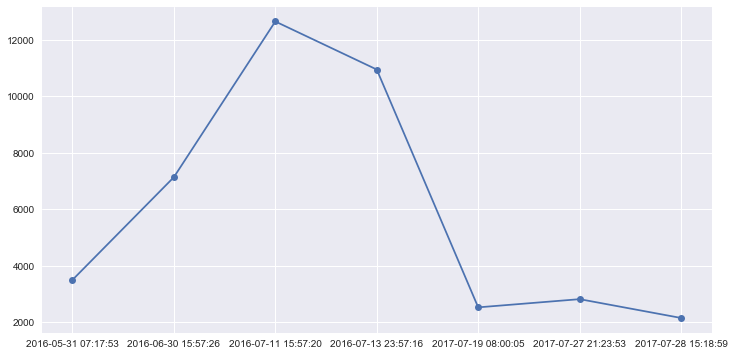

In [82]:
plt.figure(figsize=(12, 6))
plt.plot(tb23_kt['GATHERDATETIME'], tb23_kt['REJECTVALUE'], 'o-')
plt.show()